#AG2 - Actividad Guiada 2
Nombre: Sergi Ribera Ortells <br>
Link:   https://colab.research.google.com/drive/1oDy4CHtDZAECeUMHGtuFmD6Ej1bPWaI6?usp=sharing <br>
Github: https://github.com/riorser/AlgoritmosOptimizacion-.git
<br>




In [ ]:
import math

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

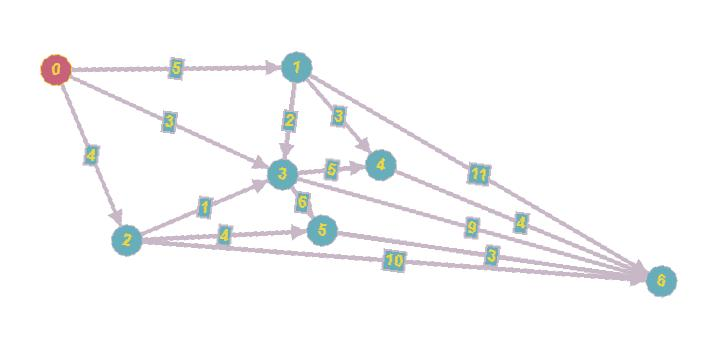

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [ ]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [ ]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [ ]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [ ]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta es:")
calcular_ruta(RUTA, 0,6)


La ruta es:


'0,2,5'

##Problema de Asignacion de tarea

In [3]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [4]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR



valor((3,2,  ),COSTES)

34

In [12]:
import itertools
def fuerza_bruta(COSTES):
  inicio = time.time()
  mejor_valor = 10e10
  mejor_solucion = ()

  for s in list(itertools.permutations(range(len(COSTES)))):
    valor_tmp = valor(s,COSTES)
    if valor_tmp < mejor_valor:
      mejor_valor = valor_tmp
      mejor_solucion = s
  fin = time.time()
  print("La solucion final es:" ,mejor_solucion , " en " , fin-inicio , " tiempo"   )
  return mejor_solucion, mejor_valor

In [5]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [6]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [ ]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [7]:
import time
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)

  inicio = time.time()
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  fin = time.time()
  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , fin - inicio , " tiempo ", " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  0.00017404556274414062  tiempo   en  10  iteraciones  para dimension:  4


Vamos a ver una comparativa entre el método de fuerta bruta y el método de ramificación y poda:

In [13]:
from random import *

for i in range(4,11):
  M = [[randint(3,30) for j in range(i)] for k in range(i)]
  ramificacion_y_poda(M)
  fuerza_bruta(M)


La solucion final es: [{'s': (1, 0, 3, 2), 'ci': 36}]  en  0.00014090538024902344  tiempo   en  10  iteraciones  para dimension:  4
La solucion final es: (1, 0, 3, 2)  en  5.1975250244140625e-05  tiempo
La solucion final es: [{'s': (3, 4, 2, 1, 0), 'ci': 36}]  en  0.0014121532440185547  tiempo   en  61  iteraciones  para dimension:  5
La solucion final es: (4, 3, 2, 0, 1)  en  0.00014543533325195312  tiempo
La solucion final es: [{'s': (2, 0, 3, 5, 1, 4), 'ci': 72}]  en  0.01432943344116211  tiempo   en  364  iteraciones  para dimension:  6
La solucion final es: (1, 4, 5, 2, 0, 3)  en  0.003209352493286133  tiempo
La solucion final es: [{'s': (4, 2, 6, 0, 1, 5, 3), 'ci': 63}]  en  0.004080295562744141  tiempo   en  124  iteraciones  para dimension:  7
La solucion final es: (3, 4, 6, 1, 0, 5, 2)  en  0.015049219131469727  tiempo
La solucion final es: [{'s': (3, 1, 4, 6, 0, 2, 7, 5), 'ci': 57}]  en  0.013315677642822266  tiempo   en  274  iteraciones  para dimension:  8
La solucion final

Vemos que para dimension 10 ya tarda 7 segundos por fuerza bruta, vamos a aumentar la dimension a 11 y analizar que pasa



In [14]:
from random import *

for i in range(4,12):
  M = [[randint(3,30) for j in range(i)] for k in range(i)]
  ramificacion_y_poda(M)
  fuerza_bruta(M)


La solucion final es: [{'s': (1, 0, 2, 3), 'ci': 47}]  en  0.00023031234741210938  tiempo   en  13  iteraciones  para dimension:  4
La solucion final es: (1, 0, 2, 3)  en  4.38690185546875e-05  tiempo
La solucion final es: [{'s': (2, 0, 1, 4, 3), 'ci': 61}]  en  0.0008001327514648438  tiempo   en  33  iteraciones  para dimension:  5
La solucion final es: (3, 2, 1, 4, 0)  en  0.0008423328399658203  tiempo
La solucion final es: [{'s': (0, 2, 4, 1, 5, 3), 'ci': 48}]  en  0.004833221435546875  tiempo   en  138  iteraciones  para dimension:  6
La solucion final es: (0, 3, 1, 5, 2, 4)  en  0.0008671283721923828  tiempo
La solucion final es: [{'s': (1, 2, 0, 5, 4, 3, 6), 'ci': 42}]  en  0.0014052391052246094  tiempo   en  54  iteraciones  para dimension:  7
La solucion final es: (2, 0, 1, 5, 4, 3, 6)  en  0.007944583892822266  tiempo
La solucion final es: [{'s': (5, 3, 1, 6, 0, 2, 4, 7), 'ci': 52}]  en  0.004142045974731445  tiempo   en  101  iteraciones  para dimension:  8
La solucion final 

Para dimension 11 tarda mucho tiempo, deja de ser una buena solución, vamos a ver hasta que valor podemos apliar el tamaño de la matriz para que el algoritmo de ramificación y poda pueda ser una buena solución.

In [11]:
from random import *

for i in range(4,20):
  M = [[randint(3,30) for j in range(i)] for k in range(i)]
  ramificacion_y_poda(M)

La solucion final es: [{'s': (0, 1, 3, 2), 'ci': 51}]  en  0.00022101402282714844  tiempo   en  9  iteraciones  para dimension:  4
La solucion final es: [{'s': (2, 1, 3, 0, 4), 'ci': 53}]  en  0.00045490264892578125  tiempo   en  23  iteraciones  para dimension:  5
La solucion final es: [{'s': (4, 0, 1, 3, 2, 5), 'ci': 48}]  en  0.0010981559753417969  tiempo   en  34  iteraciones  para dimension:  6
La solucion final es: [{'s': (4, 6, 3, 0, 1, 5, 2), 'ci': 73}]  en  0.023212671279907227  tiempo   en  268  iteraciones  para dimension:  7
La solucion final es: [{'s': (3, 7, 4, 6, 5, 0, 2, 1), 'ci': 70}]  en  0.052073001861572266  tiempo   en  422  iteraciones  para dimension:  8
La solucion final es: [{'s': (3, 6, 0, 1, 7, 2, 5, 4, 8), 'ci': 51}]  en  0.2085118293762207  tiempo   en  1512  iteraciones  para dimension:  9
La solucion final es: [{'s': (8, 7, 1, 3, 9, 0, 2, 5, 4, 6), 'ci': 89}]  en  0.5214648246765137  tiempo   en  2333  iteraciones  para dimension:  10
La solucion final es

KeyboardInterrupt: 

Despues de Estar un rato esperando a que termine la ejecución se ha detenido para dimension 12 y ha estado mucho tiempo buscando para dimension 13, esto me lleva a concluir que hay veces en que la ramificacion puede llevar demasiado tiempo en el momento en el que la dimensión crece a partir de 12/13 tampoco sería una forma muy eficiente cuando nos vamos a problemas con muchos nodos.


##Descenso del gradiente

In [5]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [17]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

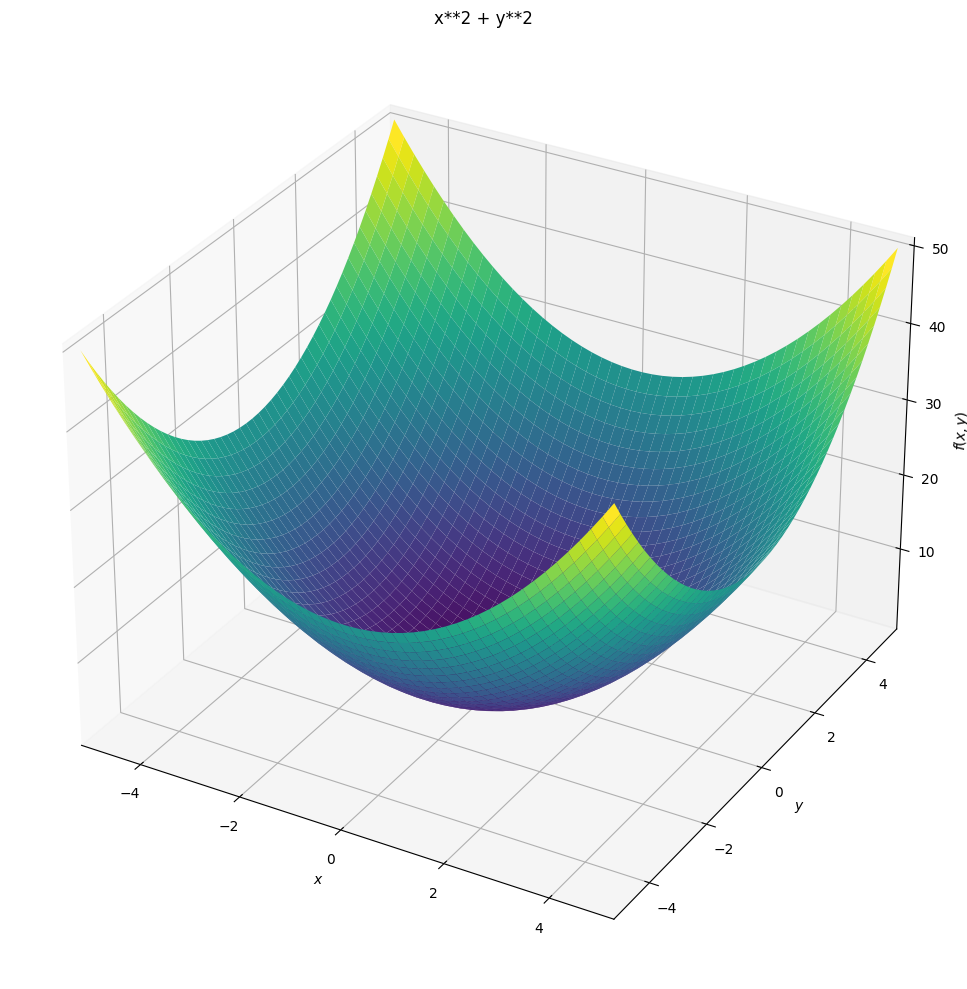

In [2]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

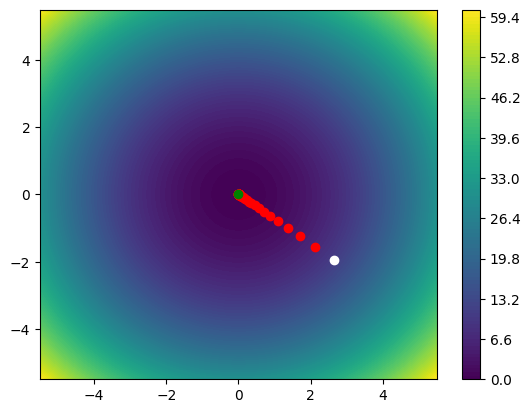

Solucion: [3.7880525625571575e-05, -2.780213055929044e-05] 2.207892685305416e-09


In [19]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
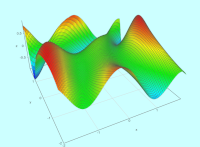


In [3]:
#Definimos la funcion
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )
df = lambda X:  [math.cos(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )*X[0] - math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.sin(2*X[0] + 1 - math.exp(X[1]) )*2 ,
                 - math.cos(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )*(1/2)*X[1]  + math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.sin(2*X[0] + 1 - math.exp(X[1]) )*math.exp(X[1])  ]


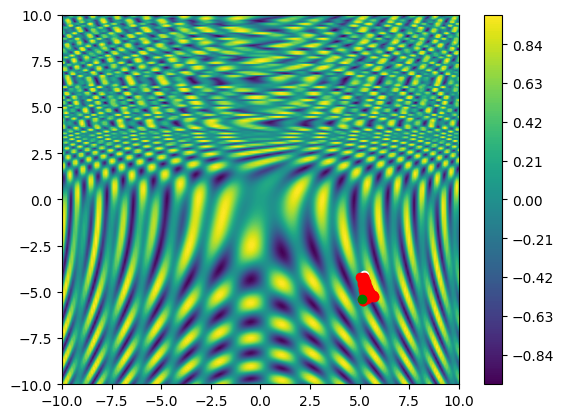

Solucion: [5.130999551122922, -5.398467611662895] 0.1346839669520443


In [14]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 200
rango=10

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-10,10  ),random.uniform(-10,10 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

  #Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))

Esto realm ente nos da un mínimo local, para evitar estos mínimps locales podriamos usar otros métodos como por ejemplo usar varios puntos aleatorios y ir selecionando el mínimo entre los mínimos por ejemplo.
